In [72]:
from google.colab import files
uploaded = files.upload()

Saving ds_salaries.csv to ds_salaries (1).csv


In [73]:
%matplotlib inline
import pandas as pd 
import matplotlib.pyplot as plt 
dt = pd.read_csv('ds_salaries.csv') 

In [74]:
dt.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [75]:
print(dt.shape)

(3755, 11)


In [76]:
print(dt['employment_type'].unique())

['FT' 'CT' 'FL' 'PT']


In [77]:
print(dt.groupby('experience_level').size())

experience_level
EN     320
EX     114
MI     805
SE    2516
dtype: int64


SUMMARY STATISTICS

In [78]:
dt.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


DATA VISUALISATION

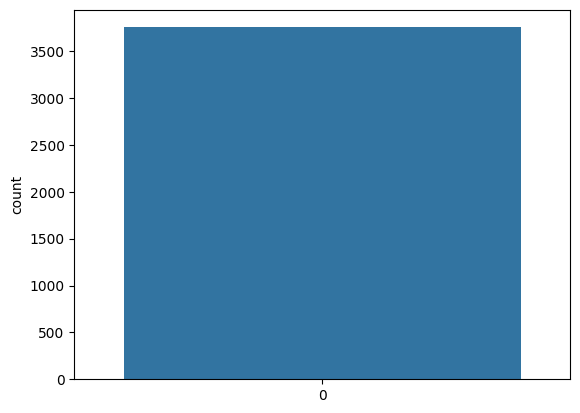

In [81]:
import seaborn as sns
sns.countplot(dt['experience_level'],label="Count")
plt.show()

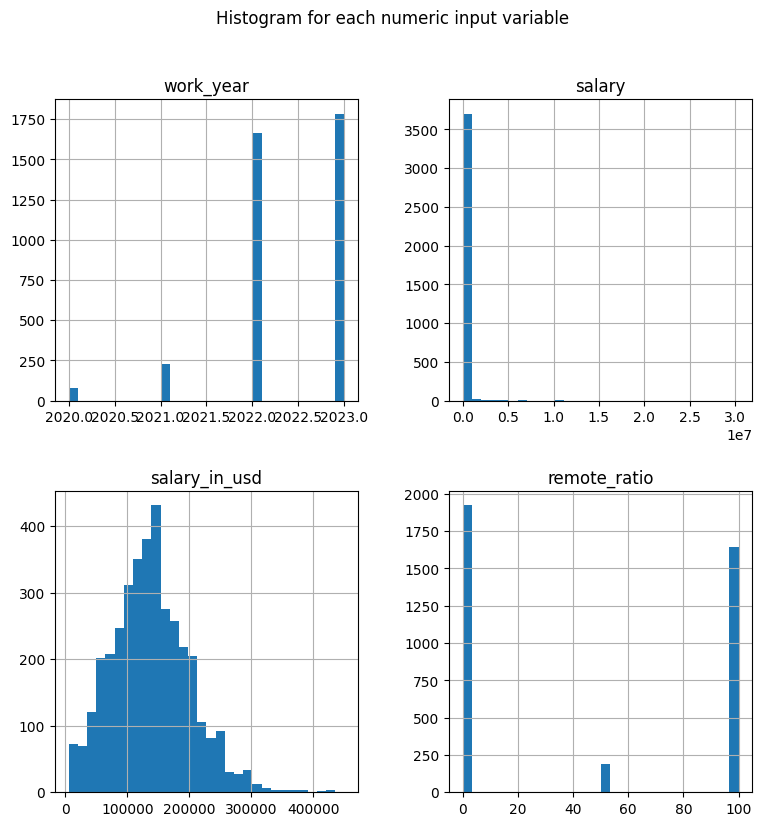

In [82]:
import pylab as pl
dt.drop('experience_level' ,axis=1).hist(bins=30, figsize=(9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('dt_hist')
plt.show()

In [80]:
dt["experience_level"].replace(['SE', 'MI', 'EN' ,'EX'],[1, 2, 3,4], inplace=True) 

In [84]:
dt["employment_type"].replace(['FT', 'CT', 'FL' ,'PT'],[1, 2, 3,4], inplace=True) 

In [93]:
feature_names = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
X = dt[feature_names]
y = dt['experience_level']


<ipython-input-94-9656c4263894>:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gnuplot')


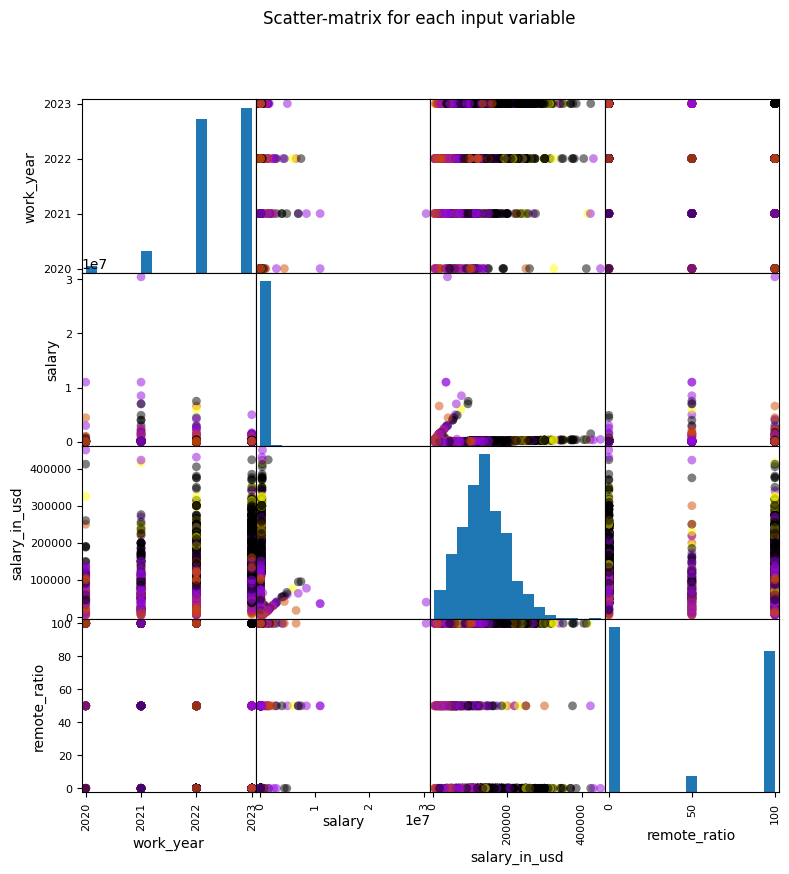

In [94]:
from pandas.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['work_year', 'salary', 'salary_in_usd', 'remote_ratio']
X = dt[feature_names]
y = dt['experience_level']



cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('salaries_scatter_matrix')

SPLITTING THE DATA


In [95]:
X.head()

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100


In [96]:
X.shape

(3755, 4)

In [97]:
#import pandas as pd 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [99]:
X_train.head()

,work_year,salary,salary_in_usd,remote_ratio
1900,2022,142200,142200,0
536,2023,120000,120000,0
3504,2021,100000,100000,100
1947,2022,125000,125000,100
3267,2022,99360,99360,100


MINMAX SCALER



In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
print(X_train)

[[0.66666667 0.00448115 0.30810937 0.        ]
 [1.         0.00375074 0.25820693 0.        ]
 [0.33333333 0.00309272 0.21324977 1.        ]
 ...
 [1.         0.00292821 0.20201048 1.        ]
 [0.66666667 0.00407975 0.28068551 1.        ]
 [0.66666667 0.00572481 0.3930784  1.        ]]


MODEL BUILDING

1. LOGISTIC REGRESSION

In [102]:
from sklearn.linear_model import LogisticRegression # import the function from library

logreg = LogisticRegression() # assign to a varibale
logreg.fit(X_train, y_train)# applying that function to our dataset

LogisticRegression()

In [103]:
dt['employment_type'] = dt['employment_type'].astype(float)

In [104]:
from sklearn.linear_model import LogisticRegression # import the function from library

logreg = LogisticRegression() # assign to a varibale
logreg.fit(X_train, y_train)# applying that function to our dataset


# evaluation 
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.68
Accuracy of Logistic regression classifier on test set: 0.71


2. DECISION TREE

In [105]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.87
Accuracy of Decision Tree classifier on test set: 0.70


3. k-NEAREST NEIGHBORS

In [106]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.75
Accuracy of K-NN classifier on test set: 0.69


4.NAIVE BAYES

In [107]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.68
Accuracy of GNB classifier on test set: 0.69


5.SVM(SUPPORT VECTOR MACHINE)

In [108]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.69
Accuracy of SVM classifier on test set: 0.70


CONFUSION MATRIX

In [109]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[573  51  14   2]
 [123  56  19   0]
 [ 36  25  18   0]
 [ 22   0   0   0]]
              precision    recall  f1-score   support

           1       0.76      0.90      0.82       640
           2       0.42      0.28      0.34       198
           3       0.35      0.23      0.28        79
           4       0.00      0.00      0.00        22

    accuracy                           0.69       939
   macro avg       0.38      0.35      0.36       939
weighted avg       0.64      0.69      0.66       939



In [110]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
pred = logreg.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[627  13   0   0]
 [163  35   0   0]
 [ 53  26   0   0]
 [ 22   0   0   0]]
              precision    recall  f1-score   support

           1       0.72      0.98      0.83       640
           2       0.47      0.18      0.26       198
           3       0.00      0.00      0.00        79
           4       0.00      0.00      0.00        22

    accuracy                           0.71       939
   macro avg       0.30      0.29      0.27       939
weighted avg       0.59      0.71      0.62       939



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
